## Fraud Detection Pipeline

### 1. Imports Necessários

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report


### 2.Importando os dados

In [42]:
credit_df = pd.read_csv('creditcard.csv')
credit_df.sample(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213755,139383.0,2.070969,-1.123520,-0.586954,-0.932172,-1.012474,-0.258795,-1.051744,0.016066,-0.126147,...,0.380230,1.093745,0.059168,-0.352120,-0.159229,-0.085755,0.004195,-0.055916,45.00,0
180148,124401.0,-4.147472,3.754226,-1.561399,-1.297810,-0.992631,1.653391,-3.572811,-6.194626,0.796050,...,7.496031,-3.328148,1.246186,-0.082496,0.153504,-0.212816,0.212526,0.042819,7.70,0
149759,91864.0,1.714366,-0.759769,-0.338197,0.600090,-0.790014,-0.397571,-0.567596,-0.112599,2.349151,...,0.133621,0.404406,0.168486,1.077117,-0.480160,0.545787,-0.092517,-0.020467,150.00,0
233486,147586.0,-0.744198,-5.366132,-2.557463,-0.603245,-1.859625,0.287174,1.226171,-0.346788,1.657532,...,1.119573,0.134052,-1.201235,0.421039,-0.579498,-0.337042,-0.248716,0.204041,1460.10,0
66901,52269.0,1.134095,0.209325,0.134433,1.021836,-0.214639,-0.792952,0.288774,-0.056775,-0.243497,...,-0.331593,-1.173863,0.116480,0.238222,0.312323,-0.758020,-0.016551,0.017185,41.64,0
169177,119567.0,-4.355454,-1.710299,-0.075151,1.473497,2.473141,-1.571962,1.323084,-0.978108,-0.320441,...,-0.692634,0.827651,0.654311,0.100266,1.394808,-0.209515,-0.580915,-0.903802,6.99,0
199017,132769.0,1.943307,-0.203695,-0.784176,1.460171,-0.042134,0.066749,-0.177394,0.086806,0.985455,...,-0.320888,-0.582632,0.183458,-0.457154,0.059310,-0.812143,0.031032,-0.059192,5.00,0
108699,71028.0,-0.359455,1.023510,1.161495,-0.125664,0.185788,-0.485226,0.553018,0.135476,-0.524547,...,-0.242548,-0.696061,-0.061498,-0.072923,-0.170452,0.077497,0.236989,0.083148,2.69,0
194499,130613.0,2.270922,-0.751238,-2.025513,-1.363505,0.247127,-0.231219,-0.372409,-0.090181,-0.709888,...,0.012374,-0.145250,0.118337,-0.385959,0.024853,-0.297575,-0.066483,-0.078455,15.00,0
160570,113466.0,1.923837,-0.296195,-0.356766,1.118705,-0.411073,0.208745,-0.765464,0.296831,0.884818,...,0.255701,0.756465,0.196140,0.641664,-0.173585,-0.605692,0.041465,-0.037668,1.00,0


### 2.1 Conhecendo o dataset

In [43]:
credit_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- Id - É um ID único para cada transação
- Time - Diferença em segundos, de cada transação com a primeira do dataset
- V1-V28 - Features do dataset que precisaram ser anonimizadas através do uso de PCA para evitar vazamento de informações sensiveis
- Amount - Quantidade de dinheiro
- Class - Classificação, 0 - Não Fraude 1 - Fraude

### 2.2 Estastísticas básicas sobre o dataset

In [44]:
credit_df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2.3 Ajustando o DataFrame

#### 2.3.1 Como a coluna tempo é a medição da diferença de tempo entre cada transação e a primeira do dataset, ela não interfere na classificação de fraude

In [45]:
credit_df = credit_df.drop(["Time"],axis=1)


#### 2.3.2 Fazendo a checagem de valores faltantes

In [46]:
credit_df.isnull().sum()


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Como não há valores faltantes não há necessidade de empregar nenhuma tipo de técnica de substituição de valores

#### 2.3.3 Checando se há desbalanceamento 

A coluna "Class" é a única categórica e e não anonimizada por tanto podemos fazer uma averiguação na proporção de Fraude/Não Fraude

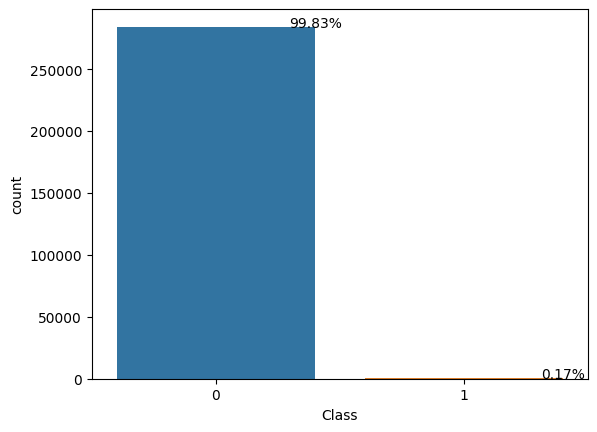

In [47]:
ax = sns.countplot(x='Class',data=credit_df)
total = float(len(credit_df))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
plt.show()


In [48]:
len(credit_df[credit_df['Class']==1])


492

In [49]:
len(credit_df[credit_df['Class']==0])


284315

Como podemos ver há um desbalanceamento enorme dentre transações com Fraude e não Fraude, e em casos como esse, a acurácia não é uma boa métrica para classificar se o modelo é bom ou não, tornando a probabilidade de se obter uma classificação 'falsa' é muito maior. Ao invés disso podemos utilizar métricas como:
- F1 Score
- Recall
- Precision
- Area Under the Curve - ROC

Notebook Referência - https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset

#### 2.3.3 Correlação entre Features

<AxesSubplot:>

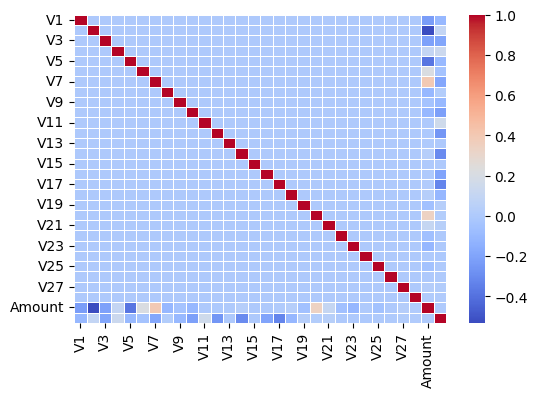

In [50]:
corr_mat =  credit_df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, annot=False, cmap='coolwarm', linewidths=0.5)


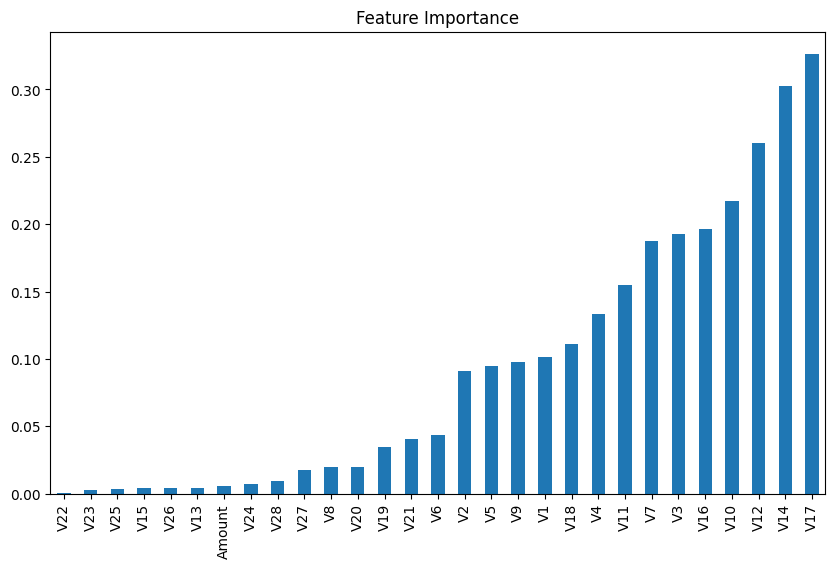

In [51]:
plt.figure(figsize=(10,6))
corr_mat['Class'][:-1].abs().sort_values().plot(kind='bar',title='Feature Importance')
plt.show()


#### 2.3.4 Verificação de Outliers

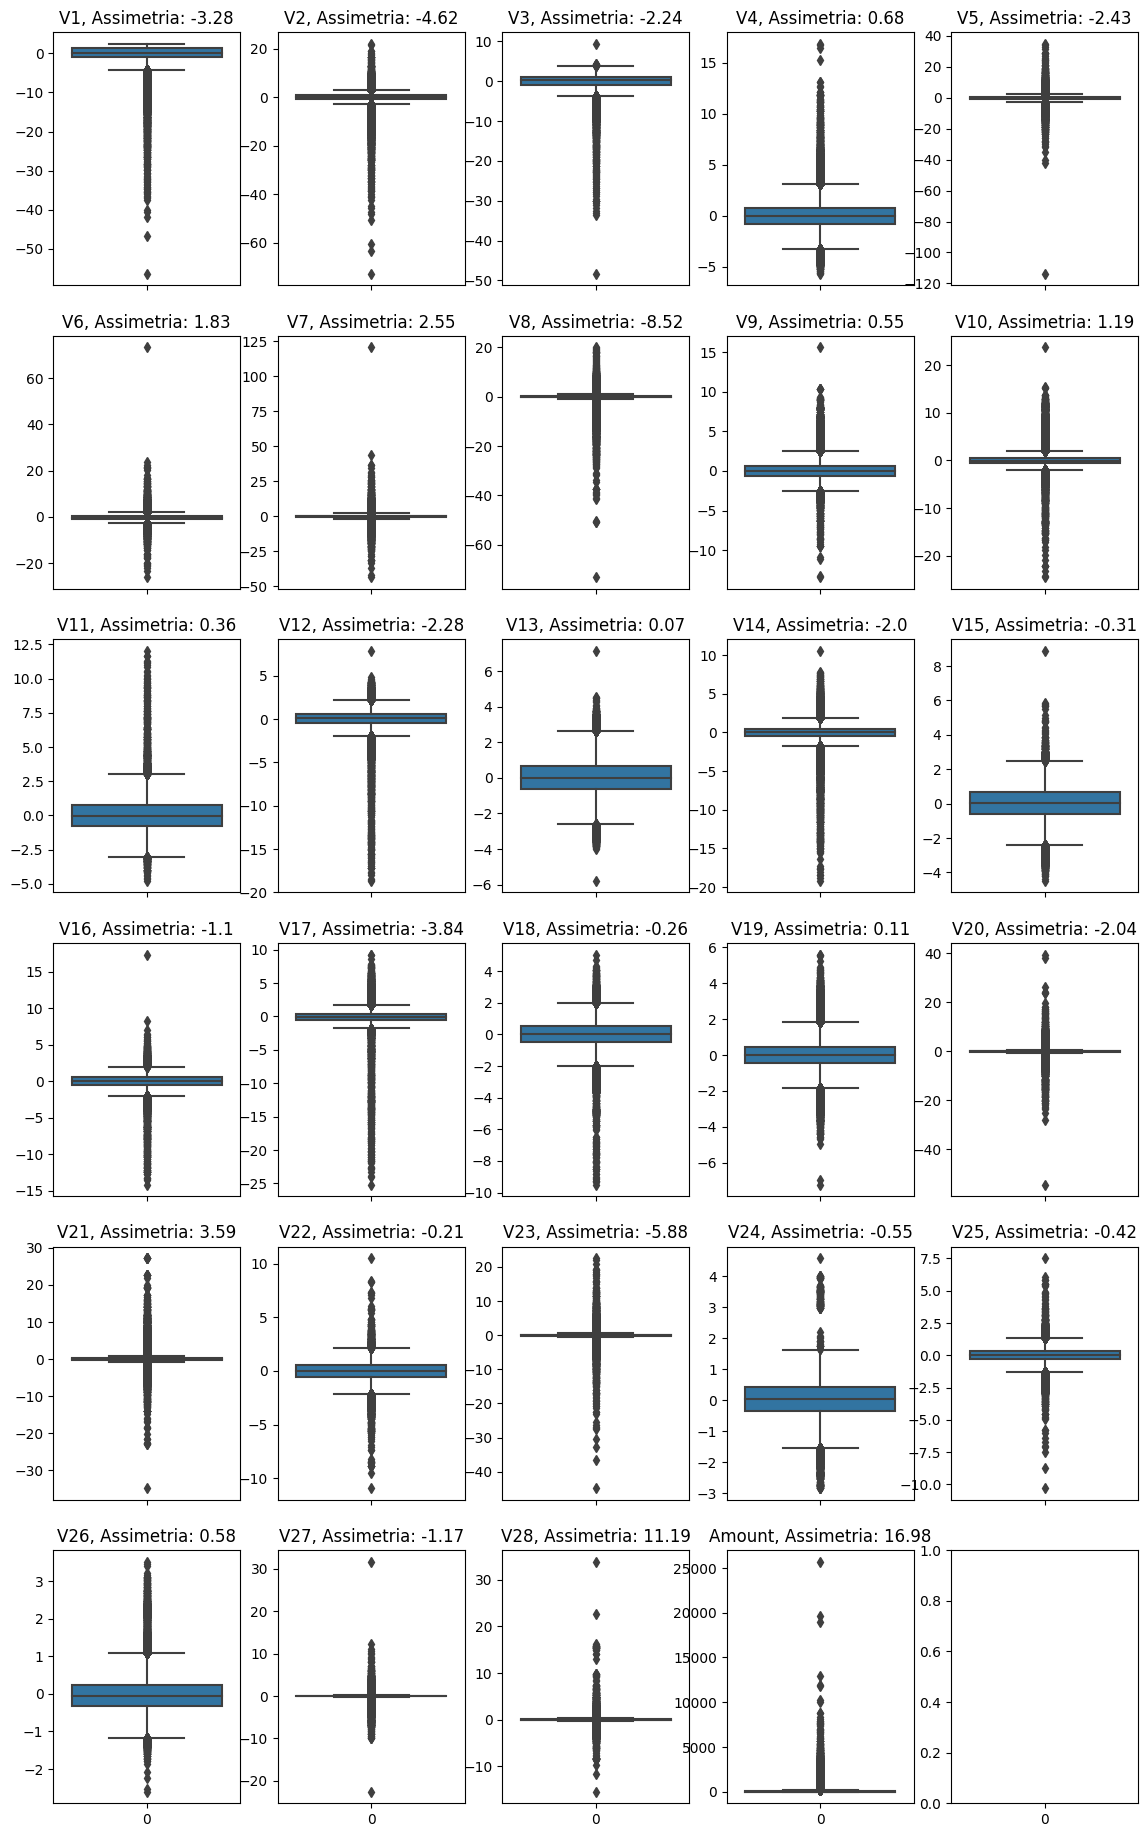

In [52]:
#Definindo intervalo com colunas numéricas
numeric = (list(credit_df.loc[:,'V1':'Amount']))

# criando sub plots para plotar cada coluna individualmente
fig,ax = plt.subplots(6,5,figsize=(14,23),sharex=True)
ax = ax.flatten()
for i,values in enumerate(numeric):
    sns.boxplot(data=credit_df[values],ax=ax[i])
    ax[i].set_title(values + ', Assimetria: '+str(round(credit_df[values].skew(axis = 0, skipna = True),2)))


Utilizando o método Interquartile Range

In [54]:
outliers_indexes = []
for col in credit_df.columns[:-1]:
    Q1 = credit_df[col].quantile(0.25)
    Q3 = credit_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = credit_df[(credit_df[col] < lower_bound) | (credit_df[col] > upper_bound)].index
    outliers_indexes.extend(outliers)
outlier_indices = Counter(outliers_indexes)
multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )


Agora a lista outliers possui todos os outliers selecionados de acordo com o método IQR.
O próximo passo é utilizar a função drop para remove-los.

In [55]:
credf_out = credit_df.drop(multiple_outliers,axis=0).reset_index(drop=True)


Checanco a quantidade de informação removida

In [56]:
len(multiple_outliers)


47116

Como muitos dados foram removidos, vale uma análise da importância dos dados removidos.


In [57]:
print('fraudes antes de removers os outliers',len(credit_df[credit_df["Class"]==1]))


fraudes antes de removers os outliers 492


In [58]:
print('fraudes antes de removers os outliers',len(credf_out[credf_out["Class"]==1]))


fraudes antes de removers os outliers 43


### 3. Preparação do Dataframe para teste e treino

#### 3.1 Separando Target de Features

In [59]:
X = credit_df.drop(columns='Class')
y = credit_df['Class']


#### 3.2 Lidando com o desbalanceamento do dataset

Como visto, o dataset é altamente desbalanceado, para mitigar o problema duas abordagens serão feitas:
1. A primemira delas é utilizar o método ***Stratified Splitting*** de maneira a preservar o máximo possível a uma distribuição normal dentre os subsets de treino e teste.
2. A segunda, é utilizar a técnica de desbalanceamento SMOTE - ***Synthetic Minority Over-sampling Technique***

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)


In [61]:
X_train.shape,X_test.shape


((199364, 29), (85443, 29))

#### 3.3 Cross Validation

In [62]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=False)
logit = LogisticRegression(random_state=0)
score = cross_val_score(logit,X_train,y_train,cv=kf,scoring='recall')
print(f"Cross Validation Recall scores are: {score}")
print(f"Average Cross Validation Recall score: {score.mean()}")


/home/joaocosentino/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/joaocosentino/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross Validation Recall scores are: [0.5942029  0.69565217 0.73913043 0.62318841 0.58823529]
Average Cross Validation Recall score: 0.6480818414322251


/home/joaocosentino/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3.4 GridSearch Hyperparameters

In [63]:
from sklearn.model_selection import GridSearchCV


In [64]:
params = {
    'C':[0.01,0.1,1,10],
    'penalty':["l1","l2",'elasticnet']
}

grid_lgit = GridSearchCV(logit,param_grid=params,cv=kf,scoring='recall').fit(X_train,y_train)


/home/joaocosentino/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/joaocosentino/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [65]:
print('Best parameters:', grid_lgit.best_params_)
print('Best score:', grid_lgit.best_score_)


Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.6482523444160273


#### Transformação/Normalização dos dados

Como os dados foram anonimzados utilizando a técnica de redução de dimensionalidade PCA, estes ja foram normalizados e portanto não precisam passar pela técnica de standard scaling. Vamos aplicar somente a feature "Amount".

In [66]:
stdscaler = StandardScaler()
feature_train = X_train[["Amount"]]
feature_test = X_test[["Amount"]]
x_train_scaled = stdscaler.fit_transform(feature_train.values)
x_test_scaled = stdscaler.fit_transform(feature_test.values)


### Aplicando o SMOTE

In [67]:
from imblearn.over_sampling import SMOTE


In [68]:
x_train_sampled,y_train_sampled=SMOTE().fit_resample(x_train_scaled,y_train)


### Criando Modelo

In [69]:
from sklearn.linear_model import LogisticRegression


In [70]:
model = LogisticRegression(random_state=0).fit(x_train_sampled,y_train_sampled)
y_pred=model.predict(x_test_scaled)


### 4. Avaliação do modelo

In [71]:
def evaluation(y_test,y_pred):

    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()


Accuracy Score: 0.8054726542841426
f1_score: 0.004313185167435452
Precision: 0.24324324324324326
Recall: 0.0021758839528558476
Classification report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89     68898
           1       0.24      0.00      0.00     16545

    accuracy                           0.81     85443
   macro avg       0.52      0.50      0.45     85443
weighted avg       0.70      0.81      0.72     85443



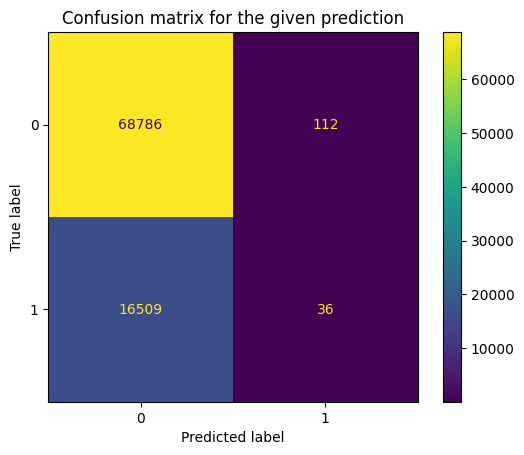

In [72]:
evaluation(y_pred,y_test)
